# Analyse en Composantes Principales

Marouane El Bissouri -
Taha EZ-ZOURY - 
Youness Bouallou

## Partie 1 – L’ACP sur l’espace de variables

### 1.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
# 1. 
# Visualiser la matrice X de dimension (n,p)
  # read the data 
data = pd.read_csv('data_PDE20.csv', delimiter=';',decimal=',')
del data['Num']
del data['Unnamed: 9']


In [3]:
def data_to_matrix(data):
    return data.values
X=data_to_matrix(data)
def moyenne(X):
    n,_=np.shape(X)
    a=np.ones((n,n))
    return (1/n)*np.dot(a,X)





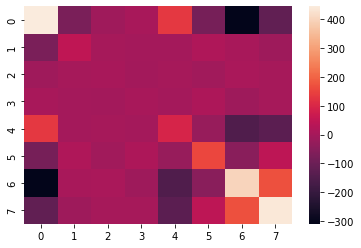

In [4]:
def cov(X):
    n,_=np.shape(X)
    a=X-moyenne(X)
    b=np.dot(np.transpose(a),a)
    return (1/(n))*b
sb.heatmap(cov(X)) 
plt.show()



In [5]:
def variance(X):
    return np.diag(cov(X))


In [6]:
def sigma(X):
    return np.sqrt(variance(X))


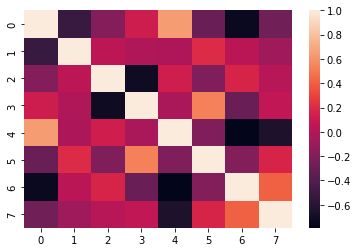

In [7]:
def corr(X):
    D=np.diag(1/sigma(X))
    a=cov(X)
    s=np.dot(a,D)
    s=np.dot(D,s)
    return s

sb.heatmap(corr(X)) 
plt.show()

In [8]:
# Remarque : On voit bien que les fonctions que nous avons construit donne les mêmes valeurs que les méthodes prédifnies 
# d'un objet data. Donc travailler avec l'un d'eux revient à faire les mêmes opérations . Il faut juste savoir s'ils ont 
# mêmes compléxité.

### 2.    

In [9]:
# Centrage : 
def center(X):
    return X-moyenne(X)

#Centrer et normer
def cennor(X):
    D = np.diag(1/sigma(X))
    return np.dot(center(X),D)


In [10]:
#les hyperplans pour lesquels l’inertie projetée est maximale :
def sorted_eig_val_vect(A) :
    eigenvalues , eigenvectors = np.linalg.eig(A)
    s = sorted ( eigenvalues , reverse = True )
    s=np.array(s)
    sorted_indices = np . argsort ( eigenvalues ) [:: -1]
    sorted_eigenvectors = eigenvectors [:,sorted_indices ]
    return s , sorted_eigenvectors

def hyperplans(X):
    A = cov(X)
    return sorted_eig_val_vect(A)

In [11]:
# On voit bien qu'on rejoint ce qu'on avait dit dans la remarque précédente 

# On essayera de faire de jolie visualisation en utilisant des hitmap

## Partie 2 - qualité de l’ACP

### 3.

In [12]:
Vpc,Vc = hyperplans(center(X))
Vpn,Vn = hyperplans(cennor(X))

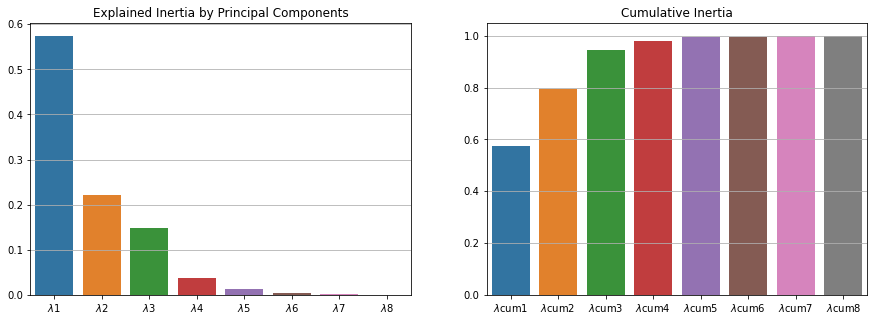

In [13]:
# Cas des données centrées
n = len(Vpc)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia by Principal Components")
ax2.set_title("Cumulative Inertia")
ax1.grid()
ax2.grid()
a = sum(Vpc)
# Create a bar plot for explained inertia :
x = [f'$\lambda${i}' for i in range(1, n + 1)]
y = [Vpc[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax1)
# Create a bar plot for cumulative explained inertia
x = [f'$\lambda$cum{i}' for i in range(1, n + 1)]
y = [sum(Vpc[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax2)

plt.show()


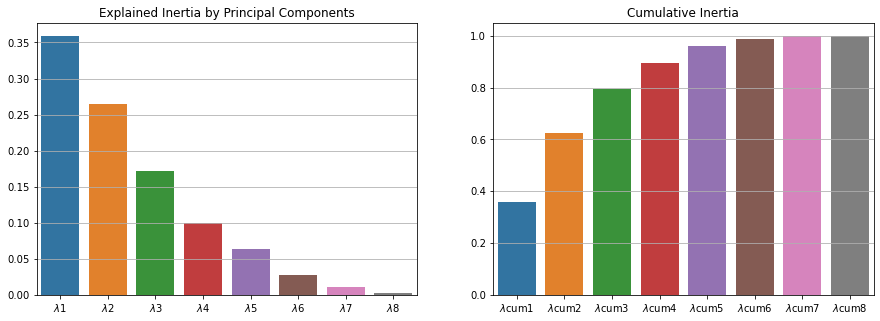

In [14]:
# Cas des données centrées et normées
n = len(Vpn)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia by Principal Components")
ax2.set_title("Cumulative Inertia")
ax1.grid()
ax2.grid()
a = sum(Vpn)
# Create a bar plot for explained inertia :
x = [f'$\lambda${i}' for i in range(1, n + 1)]
y = [Vpn[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax1)
# Create a bar plot for cumulative explained inertia
x = [f'$\lambda$cum{i}' for i in range(1, n + 1)]
y = [sum(Vpn[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax2)
print()
plt.show()
print()

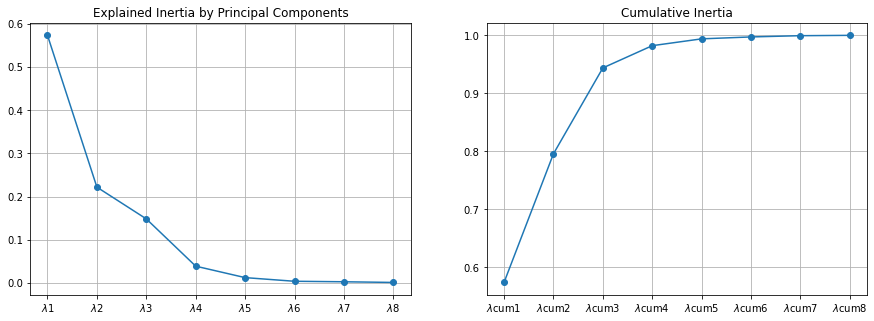

In [15]:
#règles de choix du nombre de composantes principales
## Règle de Cantell
### Donne notre cas, on se limitera à une détection visuelle des cassures 
# Cas des données centrées
n = len(Vpc)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia by Principal Components")
ax2.set_title("Cumulative Inertia")
ax1.grid()
ax2.grid()
a = sum(Vpc)
# Create a plot for explained inertia :
x = [f'$\lambda${i}' for i in range(1, n + 1)]
y = [Vpc[i]/a for i in range(n)]
ax1.plot(x,y,marker='o')
# Create a bar plot for cumulative explained inertia
x = [f'$\lambda$cum{i}' for i in range(1, n + 1)]
y = [sum(Vpc[:i + 1]) / a for i in range(n)]
ax2.plot(x,y,marker='o')
print()
plt.show()
print()

# On peut conclure que K=4

In [16]:
# The function will receive the data matrix and then apply normalization
def K_G(X):
    Z = hyperplans(cennor(X))[0]
    a = Z[Z >= 1]
    return len(a)

print(K_G(X))


3


In [17]:
def K_S_S(X):
    n,p=np.shape(X)
    Z=hyperplans(cennor(X))[0]
    a=2*np.sqrt((p-1)/(n-1))
    return len(Z[Z>a])

print(K_S_S(X))

3


### 4.

In [18]:
# Projection function:
# e = 0 means Principal Component Analysis (PCA) with centering
# e = 1 means Principal Component Analysis (PCA) with normalization
def projection(X, e, k):
    if e == 0:
        Z = center(X)
        P = hyperplans(Z)[1]
    else:
        Z = cennor(X)
        P = hyperplans(Z)[1]
    # We project onto the space of dimension k and then dimension p
    projection_k = np.dot(Z, P[:,:k])
    full_projection = np.dot(Z, P)
    return projection_k, full_projection



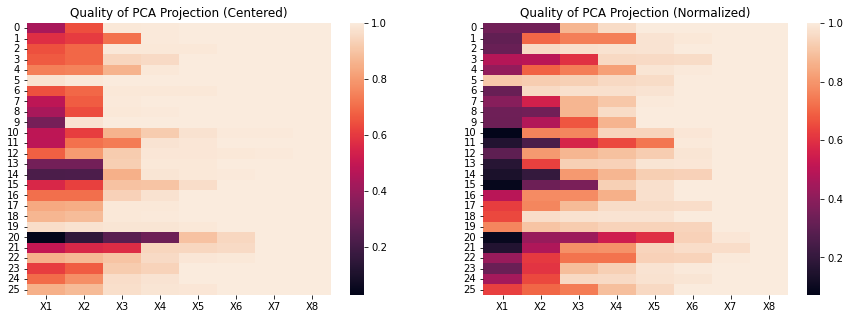

In [19]:
# Qualité de projection : 
# The function returns a quality list that records the projection quality of each individual in the K-dimensional space.
def qual_proj(X, e, k):
    X_k, X_p = projection(X, e, k)
    quality = np.sum(X_k**2, axis=1) / np.sum(X_p**2, axis=1)
    return quality

def matrix_quality(X, e):
    _, p = np.shape(X)
    L = []
    for i in range(1, p+1):
        L.append(qual_proj(X, e, i))
    return np.array(L)

d = np.transpose(matrix_quality(X, 0))
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Quality of PCA Projection (Centered)")
ax2.set_title("Quality of PCA Projection (Normalized)")
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
sb.heatmap(d, ax=ax1, xticklabels=names)
d = np.transpose(matrix_quality(X, 1))
sb.heatmap(d, ax=ax2, xticklabels=names)

plt.show()



### 5.

In [20]:
# Contribution individuelle
def contribution (X,e,k):
    if e==0:
        vp = hyperplans(center(X))[0][:k]
    else:
        vp = hyperplans(cennor(X))[0][:k]
    X_k = projection (X,e,k)[0]
    n,_ = X.shape
    c=(1/n)*(X_k**2)
    A=c/vp
    return A


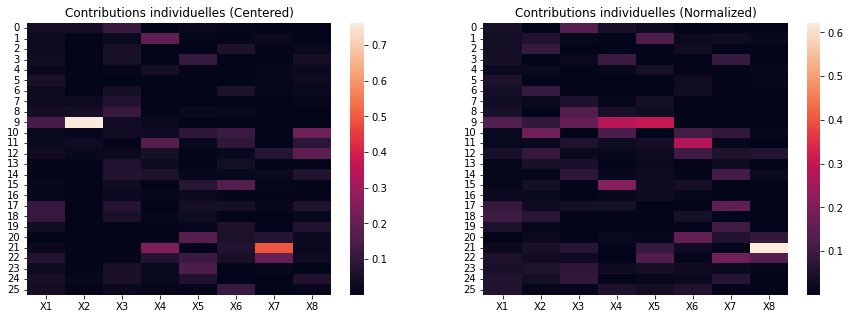

In [21]:
d=contribution(X,0,8)
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Contributions individuelles (Centered)")
ax2.set_title("Contributions individuelles (Normalized)")
names = ['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8']
sb.heatmap(d, ax=ax1, xticklabels=names)
d=contribution(X,1,8)
sb.heatmap(d, ax=ax2, xticklabels=names)
print()
plt.show()
print()

### 6.

In [22]:
# Nous allons maintenant comparer nos résulats avec les résultats obtenus à l'aide de la fonction prédéfinie PCA de 
# de python. Pour se faire, nous allons vérifier si on a obtenu le même premier plan factoriel (plan de deux dimension)
# engendré par les deux premiers vecteurs propres.
from sklearn.decomposition import PCA
# Create a PCA instance
pca = PCA(n_components=2)
# Apply PCA to our centered data
Z = pca.fit_transform(center(X))
# Get the eigenvectors
eigenvectors = pca.components_
print()
print(eigenvectors)
print()



[[ 0.60539488 -0.05008526 -0.0103714   0.00983442  0.28056837 -0.06080149
  -0.59148033 -0.44555562]
 [-0.46057614  0.14552594  0.01696215 -0.02416068  0.08615615 -0.04896718
   0.19904668 -0.84639241]]



In [23]:
# Compute the principal components using the hyperplans function on centered data
Z = hyperplans(center(X))
# Extract and print the first two principal components
principal_components = np.transpose(Z[1][:, :2])
print(principal_components)

# On a bien obtenu le même premier plan factoriel. Ceci valide notre code.

[[ 0.60539488 -0.05008526 -0.0103714   0.00983442  0.28056837 -0.06080149
  -0.59148033 -0.44555562]
 [-0.46057614  0.14552594  0.01696215 -0.02416068  0.08615615 -0.04896718
   0.19904668 -0.84639241]]


In [24]:
# ACP appliqué au données centrées et normées
Z=pca.fit_transform(cennor(X))
vecteurspropres=pca.components_
print()
print(vecteurspropres)
print()


[[ 0.51230648 -0.15355077 -0.09802888  0.10649843  0.52700652 -0.09495124
  -0.52045452 -0.36795126]
 [ 0.02488198 -0.06088817  0.53501712 -0.62970936  0.15769264 -0.49468335
   0.15829354 -0.13513285]]



In [25]:
Z=hyperplans(cennor(X))
print()
print(np.transpose(Z[1][:,:2]))
print()
# Il manque un moins en facteur, mais le résultat reste valide puisque on obtient le même axe .


[[-0.51230648  0.15355077  0.09802888 -0.10649843 -0.52700652  0.09495124
   0.52045452  0.36795126]
 [ 0.02488198 -0.06088817  0.53501712 -0.62970936  0.15769264 -0.49468335
   0.15829354 -0.13513285]]



### 7.

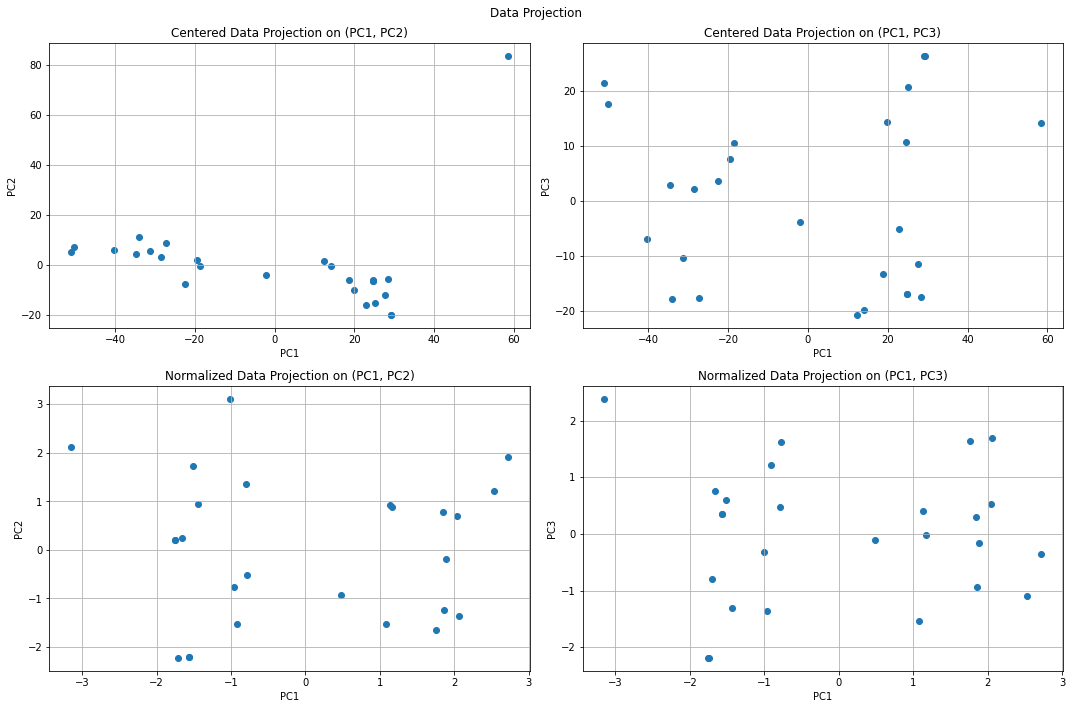

In [26]:
# On représentee graphiquement les nouveaux individus dans le nouveau sous-espace selon le premier plan (CP1,CP2) 
# et le deuxième plan (CP1,CP3)

# First, create a 2x2 grid for subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Title for the entire set of subplots
fig.suptitle('Data Projection')

# Create subplots for centered data with CP1, CP2
Z = projection(X, 0, 3)[0]
ax1 = axes[0, 0]
ax1.set_title('Centered Data Projection on (PC1, PC2)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax1.scatter(Z[:, 0], Z[:, 1])
ax1.grid()

# Create subplots for centered data with CP1, CP3
ax2 = axes[0, 1]
ax2.set_title('Centered Data Projection on (PC1, PC3)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax2.scatter(Z[:, 0], Z[:, 2])
ax2.grid()

# Create subplots for normalized data with CP1, CP2
Z = projection(X, 1, 3)[0]
ax3 = axes[1, 0]
ax3.set_title('Normalized Data Projection on (PC1, PC2)')
ax3.set_xlabel('PC1')
ax3.set_ylabel('PC2')
ax3.scatter(Z[:, 0], Z[:, 1])
ax3.grid()

# Create subplots for normalized data with CP1, CP3
ax4 = axes[1, 1]
ax4.set_title('Normalized Data Projection on (PC1, PC3)')
ax4.set_xlabel('PC1')
ax4.set_ylabel('PC3')
ax4.scatter(Z[:, 0], Z[:, 2])
ax4.grid()

# Adjust the layout
plt.tight_layout()

# Show all subplots
print()
plt.show()
print()


#### Comparaison de notre implémentation de l'ACP avec l'implémentation prédéfinie de python. 
#### Pour se faire nous allons réprésenter graphiquement nos données sur les mêmes plans (CP1,CP2) et (CP1,CP3)


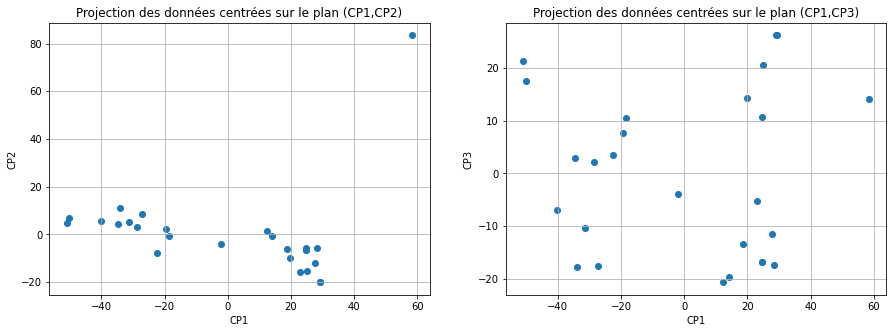

In [27]:
from sklearn.decomposition import PCA
# Création d'un instance PCA
pca=PCA(n_components=3)
pca.fit(center(X))
# ACP appliqué à nos données centrées
Z=pca.transform(center(X))
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection des données centrées sur le plan (CP1,CP2)')
ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection des données centrées sur le plan (CP1,CP3)')
ax2.set_xlabel('CP1')
ax2.set_ylabel('CP3')
Z=projection(X,0,3)[0]
ax1.scatter(Z[:,0],Z[:,1])
ax2.scatter(Z[:,0],Z[:,2])
ax1.grid()
ax2.grid()
# On voit bien qu'on obtient les mêmes figures précédentes.

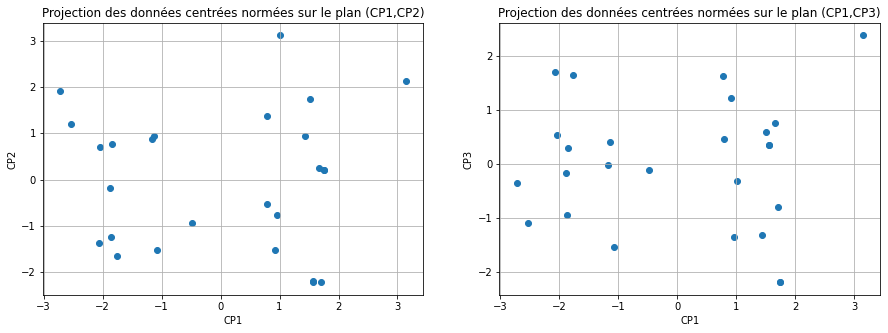

In [28]:
# Pour les données centrées normées :
Z=projection(X,1,3)[0]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection des données centrées normées sur le plan (CP1,CP2)')
ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection des données centrées normées sur le plan (CP1,CP3)')
ax2.set_xlabel('CP1')
ax2.set_ylabel('CP3')
ax1.scatter(-Z[:,0],Z[:,1]) # On muliplie par -1 on a vu précédement qu'il manquait
ax2.scatter(-Z[:,0],Z[:,2])
ax1.grid()
ax2.grid()

# On retrouve la même chose

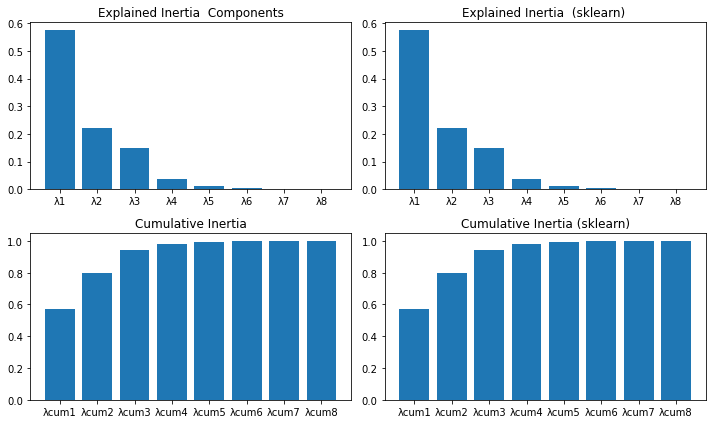

In [29]:
# Une dernière comparaison c'est de comparer les histogrammes
# Case of centered data
pca = PCA()

# Apply PCA to your data
pca.fit_transform(center(X))
E = pca.explained_variance_
fig, axes = plt.subplots(2, 2, figsize=(10, 6))

R = hyperplans(center(X))
n = len(R[0])
x = [f'λ{i}' for i in range(1, n+1)]  
a = sum(R[0])
y = [R[0][i]/a for i in range(n)] 

axes[0, 0].bar(x, y)
axes[0, 0].set_title("Explained Inertia  Components")
a = sum(E)
y = [E[i]/a for i in range(n)] 
axes[0, 1].bar(x, y)
axes[0, 1].set_title("Explained Inertia  (sklearn) ")

a = sum(R[0])
x = [f'λcum{i}' for i in range(1, n+1)] 
y = [sum(R[0][:i+1])/a for i in range(n)] 
axes[1, 0].bar(x, y)
axes[1, 0].set_title('Cumulative Inertia')
a = sum(E)
y = [sum(E[:i+1])/a for i in range(n)] 
axes[1, 1].bar(x,y)
axes[1, 1].set_title('Cumulative Inertia (sklearn)')

plt.tight_layout()
print()
plt.show()
print()

In [30]:
# Cela renforce la validation de notre implémentation. Danke !

## Partie 3 : Etude de la forme du nuage initiale et réduction de dimension

## 8.

0.5799317776606381


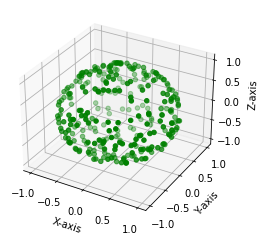

In [31]:
# Génération aléatoire gaussienne normée de n individus ayant trois paramètres 
# En d'autres termes, création d'un nuage isotrope
n = 300
s = 5
np.random.seed(s)
S = np.random.randn(3, n)

#Normalize the data points to get a sphere : 
a = np.sqrt(np.sum(S**2, axis=0))
A = S/a

X, Y, Z = A
print(np.std(Z))
# Create a 3D scatter plot :
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='g', marker='o')  
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
plt.show()


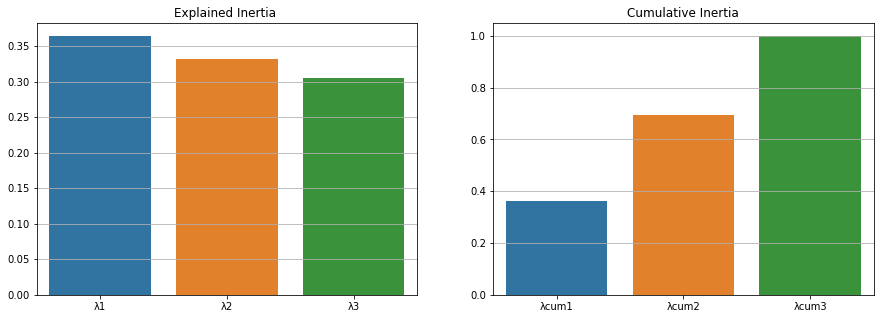

In [32]:
# matice de données shape = (300,3)
X=np.transpose(A)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia ")
ax1.grid()
ax2.set_title('Cumulative Inertia')
ax2.grid()
# Get the eigenvalues of the dataset :
Vp = hyperplans(X)[0]

n = len(Vp)
a = sum(Vp)
x = [f'λ{i}' for i in range(1, n+1)]
y = [Vp[i]/a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax1)

x = [f'λcum{i}' for i in range(1, n+1)]
y = [sum(Vp[:i+1])/a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax2)
print()
plt.show()
print()

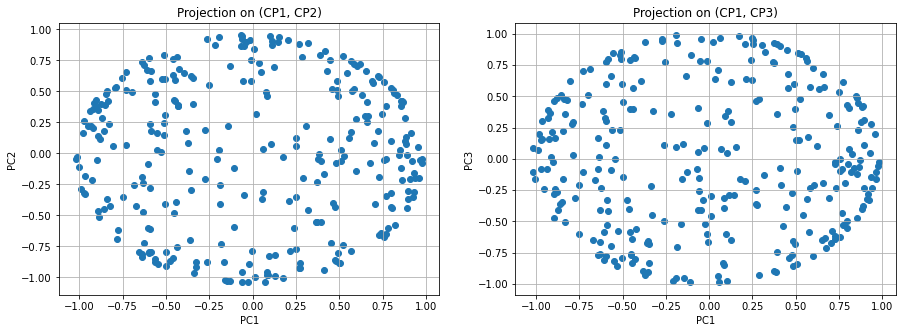

In [33]:
#Matrix of new coordinates :
Z = projection(X, 0, 3)[0]
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection on (CP1, CP2)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection on (CP1, CP3)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax1.scatter(Z[:, 0], Z[:, 1])
ax2.scatter(Z[:, 0], Z[:, 2])
ax1.grid()
ax2.grid()
print()
plt.show()
print()

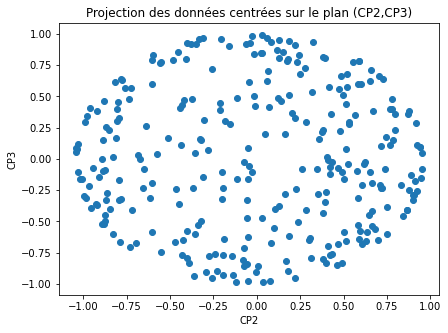

In [34]:
Z=projection(X,0,3)[0]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection des données centrées sur le plan (CP2,CP3)')
ax1.set_xlabel('CP2')
ax1.set_ylabel('CP3')
Z=projection(X,0,3)[0]
ax1.scatter(Z[:,1],Z[:,2])


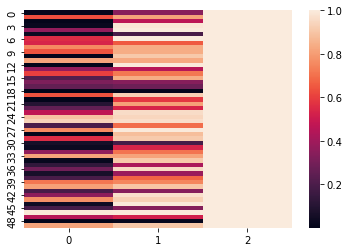

In [35]:
#heatmap de la qualité de projection
d=np.transpose(matrix_quality(X,0))[:50] #heatmap sur 20 individus
sb.heatmap(d) 
plt.show()

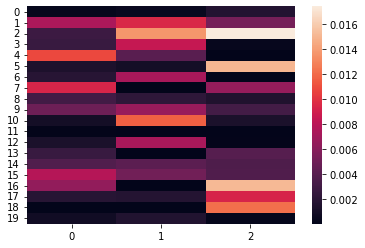

In [36]:
#heatmap de la contribution individuelle pour 20 individus
X=np.transpose(S)
d=contribution(X,0,3)[:20]
sb.heatmap(d) 
plt.show()

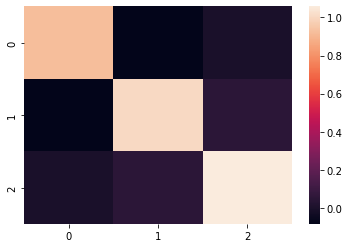

In [37]:
#heatmap de la matrice de corrélation (300 individus)
sb.heatmap(cov(X)) 
print()
plt.show()
print()

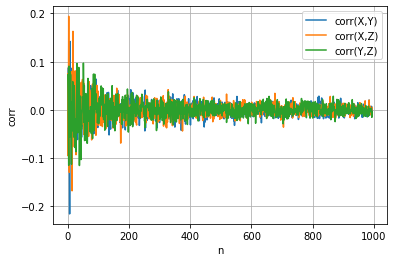

In [38]:
# Evolution de la matrice corrélation avec le nombre d'individus n
def nuage(n):
    s=5
    np.random.seed(s)
    S=np.random.randn(3,n)
    a=np.sqrt(np.sum(S**2,axis=0))
    return np.transpose(S/a)
L=[]
M=[]
N=[]
for n in range(4,1000):
    T=cov(nuage(n))
    L.append(T[0][1])
    M.append(T[0][2])
    N.append(T[1][2])
plt.grid()
plt.xlabel('n')
plt.ylabel('corr')
plt.plot(L,label='corr(X,Y)')
plt.plot(M,label='corr(X,Z)')
plt.plot(N,label='corr(Y,Z)')
plt.legend()
print()
plt.show()
print()


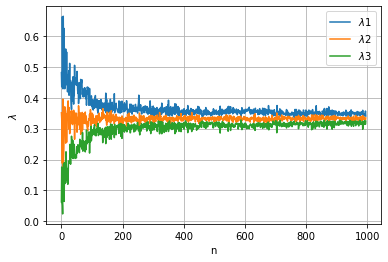

In [39]:
#Cascade des valeurs propres
L=[]
M=[]
N=[]

for n in range(4,1000):
    #eignvalues
    T=hyperplans(nuage(n))[0]
    L.append(T[0])
    M.append(T[1])
    N.append(T[2])
plt.grid()
plt.xlabel('n')
plt.ylabel('$\lambda$')
plt.plot(L,label='$\lambda$1')
plt.plot(M,label='$\lambda$2')
plt.plot(N,label='$\lambda$3')
plt.legend()
print()
plt.show()
print()
# Remarque : Si la fonction nuage(n) retourne S à la place S/a , on verra que les lambdas convergent vers 1 càd vers
# la variance de la loi guassinne.
# Mais ici on constate que les lambaa converge eux aussi vers une constante inférieure. à vérifier si c'est la variance
# de la loi.

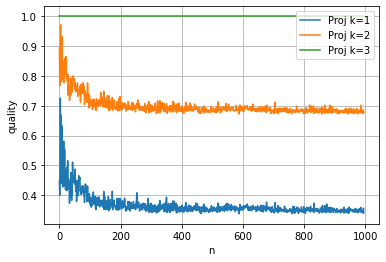

In [40]:
# Cascade des moyennes de  qualités de projections :
L=[]
M=[]
N=[]

for n in range(4,1000):
    T=matrix_quality(nuage(n),0)
    L.append(np.mean(T[0]))
    M.append(np.mean(T[1]))
    N.append(np.mean(T[2]))
plt.grid()
plt.xlabel('n')
plt.ylabel('quality')
plt.plot(L,label='Proj k=1')
plt.plot(M,label='Proj k=2')
plt.plot(N,label='Proj k=3')
plt.legend(loc='upper right')
plt.show()


In [41]:
# D'après le graphique, la qualité de projection (pour les espaces de dim=2 ou 1) se stabilise après un certain rang
# ceci est dû au fait qu'on travaille avec un nuage isotrope et qu'après un certains rang tous les composantes auront
# la même importantce ce qui rend la projection sur un seul axe susceptible à faire perdre l'information.

## 9.

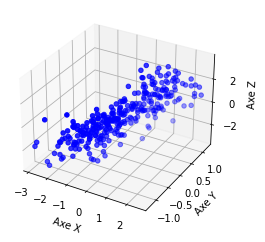

In [42]:
#Création d'un nuage non isotrope
n=300
s=5
np.random.seed(s)
X = sorted(np.random.randn(n))
Y = np.random.randn(n)
Z= np.random.randn(n) + np.arctan(X,Y)
S=np.array([X,Y,Z])
# Center the data
S=center(np.transpose(S))
X=S[:,0]
Y=S[:,1]
Z=S[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c='b', marker='o') 
ax.set_xlabel('Axe X')
ax.set_ylabel('Axe Y')
ax.set_zlabel('Axe Z')
plt.show()

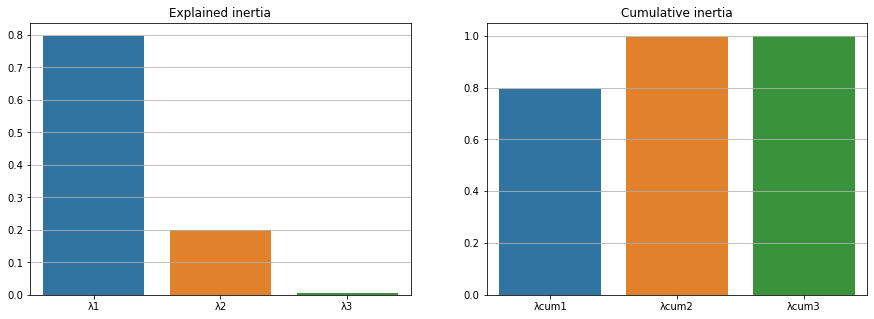

In [43]:
X=S
# Application de l'ACP sur le nuages
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained inertia")
ax1.grid()
ax2.set_title('Cumulative inertia')
ax2.grid()
#Eignvalues :
Vp = hyperplans(X)[0]
n=len(Vp)
x = [f'λ{i}' for i in range(1, n+1)]  
a = sum(Vp)
y = [Vp[i]/a for i in range(n)] 
sb.barplot(x=x, y=y,ax=ax1)
x = [f'λcum{i}' for i in range(1, n+1)]
y = [sum(Vp[:i+1])/a for i in range(n)]
sb.barplot(x=x, y=y,ax=ax2)
plt.show()

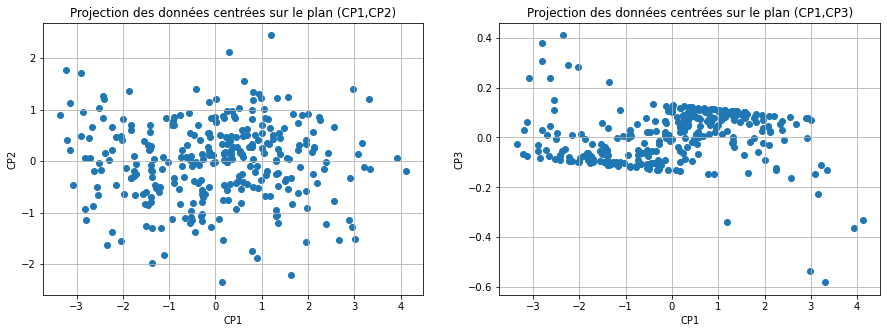

In [44]:
Z=projection(X,0,3)[0]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection des données centrées sur le plan (CP1,CP2)')
ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection des données centrées sur le plan (CP1,CP3)')
ax2.set_xlabel('CP1')
ax2.set_ylabel('CP3')
Z=projection(X,0,3)[0]
ax1.scatter(Z[:,0],Z[:,1])
ax2.scatter(Z[:,0],Z[:,2])
ax1.grid()
ax2.grid()
plt.show()

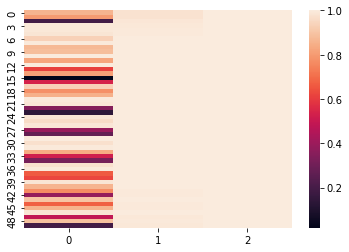

In [45]:
#heatmap de la qualité de projection
d=np.transpose(matrix_quality(X,0))[:50] #heatmap sur 20 individus
sb.heatmap(d) 
plt.show()

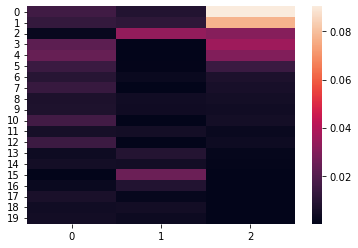

In [46]:
#heatmap de la contribution individuelle pour 20 individus
d=contribution(X,0,3)[:20]
sb.heatmap(d) 
plt.show()

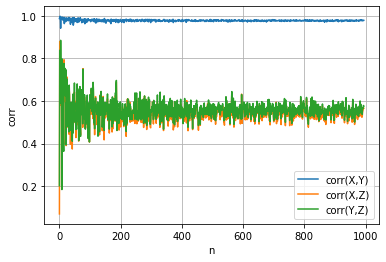

In [47]:
# Evolution de la matrice corrélation avec le nombre d'individus n
def nuage(n):
    X = sorted(np.random.normal(0, 1, (n)))
    Y = np.random.normal(0, 1, (n))
    Z= np.random.normal(0, 1, (n)) + np.arctan(X,Y)
    S=np.array([X,Y,Z])
    #Center data
    S=center(np.transpose(S))
    return S
L=[]
M=[]
N=[]
for n in range(5,1000):
    T=corr(nuage(n))
    L.append(T[0][1])
    M.append(T[0][2])
    N.append(T[1][2])
plt.grid()
plt.xlabel('n')
plt.ylabel('corr')
plt.plot(L,label='corr(X,Y)')
plt.plot(M,label='corr(X,Z)')
plt.plot(N,label='corr(Y,Z)')
plt.legend()
plt.show()

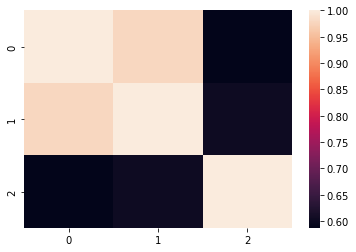

In [48]:
#heatmap de la matrice de covariance
sb.heatmap(corr(X)) 
print()
plt.show()
print()

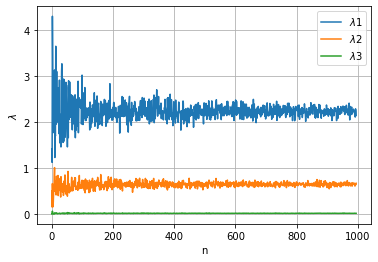

In [49]:
#Cascade des valeurs propres
L=[]
M=[]
N=[]
for n in range(4,1000):
    T=hyperplans(nuage(n))
    L.append(T[0][0])
    M.append(T[0][1])
    N.append(T[0][2])
plt.grid()
plt.xlabel('n')
plt.ylabel('$\lambda$')
plt.plot(L,label='$\lambda$1')
plt.plot(M,label='$\lambda$2')
plt.plot(N,label='$\lambda$3')
plt.legend()
print()
plt.show()
print()

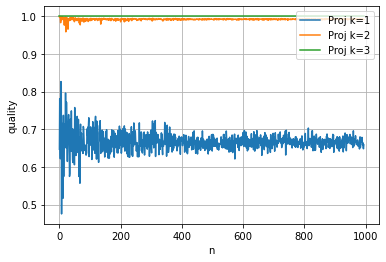

In [50]:
# Cascade des moyennes de  qualités de projections :
L=[]
M=[]
N=[]

for n in range(5,1000):
    T=matrix_quality(nuage(n),0)
    L.append(np.mean(T[0]))
    M.append(np.mean(T[1]))
    N.append(np.mean(T[2]))
plt.grid()
plt.xlabel('n')
plt.ylabel('quality')
plt.plot(L,label='Proj k=1')
plt.plot(M,label='Proj k=2')
plt.plot(N,label='Proj k=3')
plt.legend(loc='upper right')
print()
plt.show()
print()

In [51]:
# On peut voir que porjeter sur le plan (cp1,cp2), transmettra presque tout l'information soit 95%

## 10. Points extrémaux :

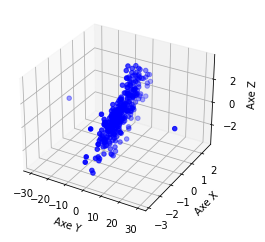

In [52]:
#Création d'un nuage non isotrope avec ajout de deux points extrémaux suivant l'axe Z
n=300
s=5
np.random.seed(s)
X = sorted(np.random.normal(0, 1, n))
Y = np.random.normal(0, 1, n)
Z = np.random.normal(0, 1, n) + np.arctan(X,Y)
c=np.mean(Z)

#Ajout des points : (0,-10,c) et (0,10,c)
X.extend([0,0])
Y=Y.tolist()                   
Y.extend([-30,30])
Z=Z.tolist()
Z.extend([c,c])
S=np.array([X,Y,Z])
S=np.transpose(S)
X=center(S)
x=X[:,0]
y=X[:,1]
z=X[:,2]
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y, x , z, c='b', marker='o') 

ax.set_xlabel('Axe Y')
ax.set_ylabel('Axe X')
ax.set_zlabel('Axe Z')
plt.show()

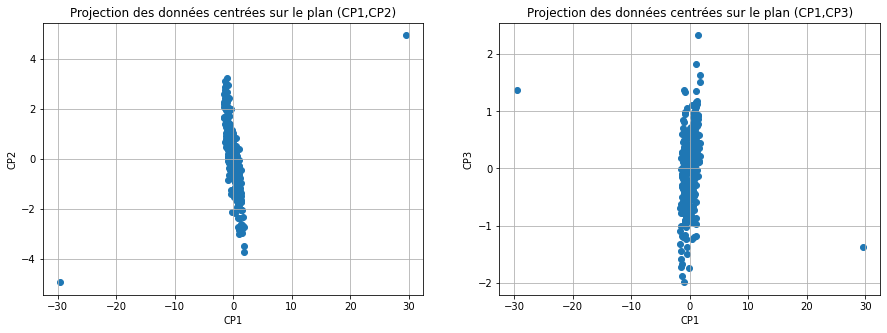

In [53]:

Z=projection(X,0,3)[0]
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection des données centrées sur le plan (CP1,CP2)')
ax1.set_xlabel('CP1')
ax1.set_ylabel('CP2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection des données centrées sur le plan (CP1,CP3)')
ax2.set_xlabel('CP1')
ax2.set_ylabel('CP3')
Z=projection(X,0,3)[0]
ax1.scatter(Z[:,0],Z[:,1])
ax2.scatter(Z[:,0],Z[:,2])
ax1.grid()
ax2.grid()

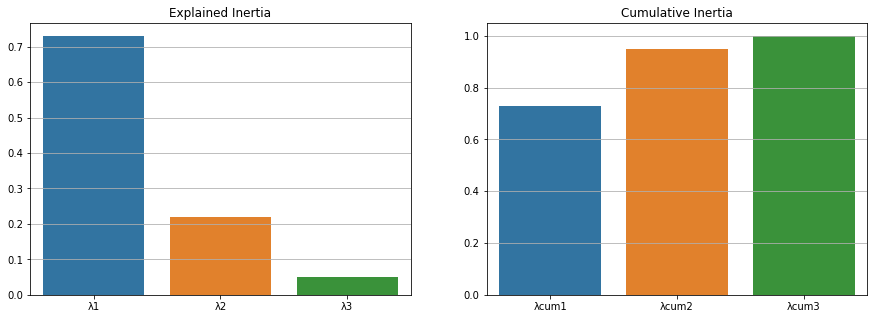

In [54]:

# Application de l'ACP sur le nuages
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia")
ax1.grid()
ax2.set_title('Cumulative Inertia')
ax2.grid()
Vpc = hyperplans(X)[0]
n=len(Vpc)
x = [f'λ{i}' for i in range(1, n+1)]  
a = sum(Vpc)
y = [Vpc[i]/a for i in range(n)] 
sb.barplot(x=x, y=y,ax=ax1)
x = [f'λcum{i}' for i in range(1, n+1)]
y = [sum(Vpc[:i+1])/a for i in range(n)]
sb.barplot(x=x, y=y,ax=ax2)
plt.show()


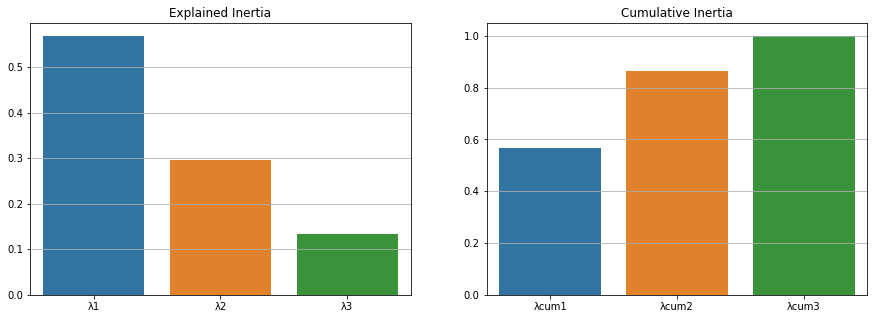

In [55]:
# Normalise Data Matrix
X=cennor(X)
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia")
ax1.grid()
ax2.set_title('Cumulative Inertia')
ax2.grid()
Vpn = hyperplans(X)[0]
n=len(Vpn)
x = [f'λ{i}' for i in range(1, n+1)]  
a = sum(Vpn)
y = [Vpn[i]/a for i in range(n)] 
sb.barplot(x=x, y=y,ax=ax1)
x = [f'λcum{i}' for i in range(1, n+1)]
y = [sum(Vpn[:i+1])/a for i in range(n)]
sb.barplot(x=x, y=y,ax=ax2)
plt.show()

## Partie 4 . Etude de la forme du nuage initiale sur la réduction de dimension dans les deux espaces :

### 11.

### 11.1.

In [56]:
#1). Introduction : 
# We recall that:
def sorted_eig_val_vect(A):
    eigenvalues, eigenvectors = np.linalg.eig(A)
    s = sorted(eigenvalues, reverse=True)
    s = np.array(s)
    sorted_indices = np.argsort(eigenvalues)[::-1]
    sorted_eigenvec = eigenvectors[:, sorted_indices]
    s = s.astype(np.float64)
    sorted_eigenvectors =sorted_eigenvec.astype(np.float64)
    return s, sorted_eigenvectors

# Two new functions are constructed:
# X matrix must be centered and scaled by the square root of the number of individuals
def cov_dual(X):  
    # Calculates the covariance matrix 
    b = np.dot(np.transpose(X), X)
    return b

def hyperplans_dual(X):
    # Computes eigenvalues and eigenvectors from the covariance matrix (X matrix must be preprocessed)
    A = cov_dual(X)  
    return sorted_eig_val_vect(A)



In [57]:
#2). Cas nuage isotrope : 
#2.1). Génération des points isotropes :
n = 300
s = 5
np.random.seed(s)
S = np.random.randn(3,n)

#Normalize the data points to get a sphere : 
a = np.sqrt(np.sum(S**2, axis=0))
# penalisation avec sqrt(n)
X = cennor(np.transpose(S/a))/np.sqrt(n)


In [58]:
#2.2) # Application de l'ACP et de l'ACP dua sur le nuage :
Vp,_=hyperplans_dual(X) # diagonalisation in space R^p
Vn,_=hyperplans_dual(np.transpose(X)) # diagonalisation in space R^n

C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


In [59]:
Vp

array([1.08576131, 0.98948012, 0.92475858])

In [60]:
Vn[0:3]

array([1.08576131, 0.98948012, 0.92475858])

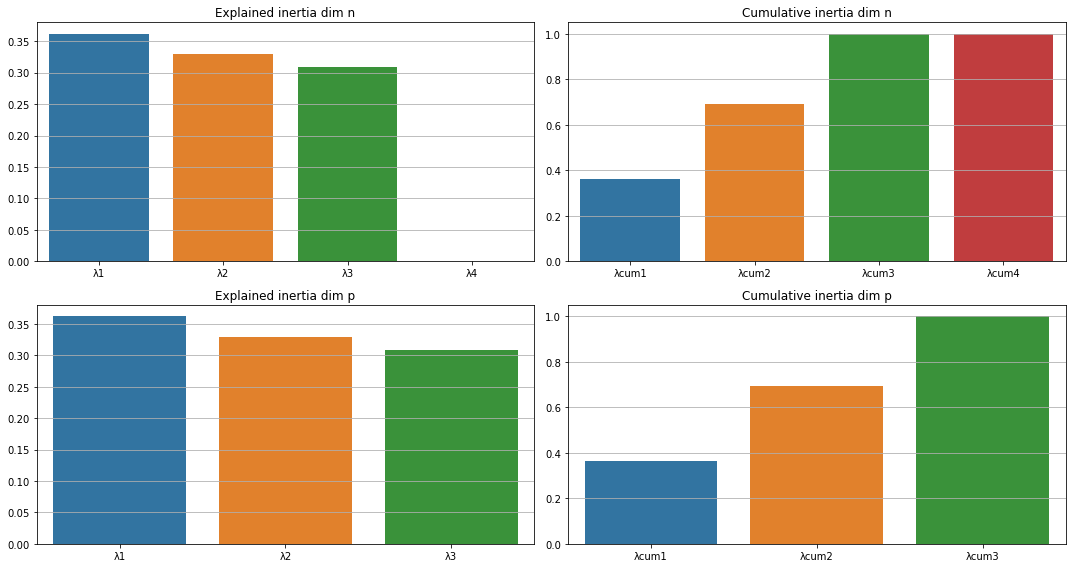

In [61]:
# Create a figure with a 2x2 subplot layout and set the figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

# Set titles for each subplot
ax1.set_title("Explained inertia dim n")
ax2.set_title('Cumulative inertia dim n')
ax3.set_title("Explained inertia dim p")
ax4.set_title('Cumulative inertia dim p')

# Set grids for each subplot
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

# Eignvalues :
n = 4
x = [f'λ{i}' for i in range(1, n + 1)]
a = sum(Vp)
y = [Vn[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax1)

x = [f'λcum{i}' for i in range(1, n + 1)]
y = [sum(Vn[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax2)


n = len(Vp)
x = [f'λ{i}' for i in range(1, n + 1)]
a = sum(Vp)
y = [Vp[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax3)

x = [f'λcum{i}' for i in range(1, n + 1)]
y = [sum(Vp[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax4)
plt.tight_layout()
# Show the plot
print()
plt.show()
print()

In [62]:
#2.3) Calculating the new coordinates (Projection) :

# Projection: 
def projection_dual(X,k): 
    # We project onto the space of dimension k and then dimension p
    P = hyperplans_dual(X)[1]
    projection_k = np.dot(X, P[:,:k])
    full_projection = np.dot(X, P)
    return projection_k, full_projection

In [63]:
A = np.transpose(X)
Vn,_ = projection_dual(A,3)

C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


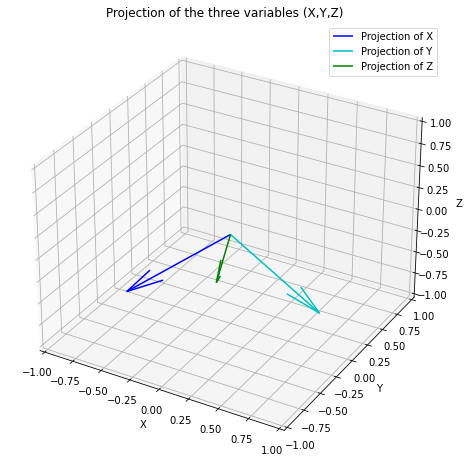

In [64]:
from mpl_toolkits.mplot3d import Axes3D
#2.4.1) Visualisation in 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Define the components of the vectors
vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]

# Origin of the vectors
origin = np.zeros(3)

# Draw the vectors
ax.quiver(origin[0], origin[1], origin[2], 
          vector1[0], vector1[1], vector1[2], color='b', label='Projection of X')
ax.quiver(origin[0], origin[1], origin[2], 
          vector2[0], vector2[1], vector2[2], color='c', label='Projection of Y')
ax.quiver(origin[0], origin[1], origin[2], 
          vector3[0], vector3[1], vector3[2], color='g', label='Projection of Z')

# Set the axis limits:
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Label the axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Display the figure
plt.legend()
plt.title('Projection of the three variables (X,Y,Z)')
plt.show()


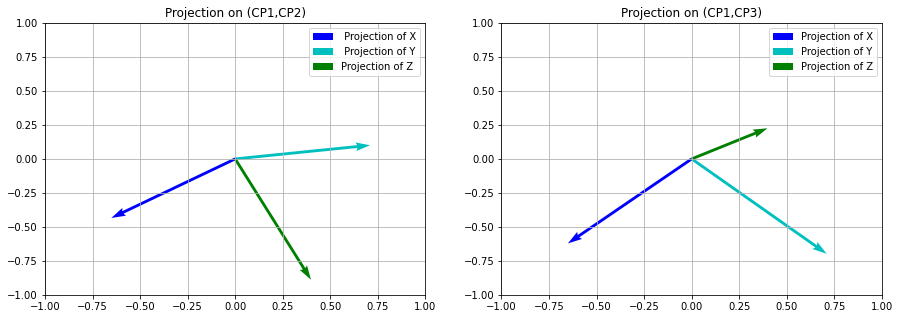

In [65]:
#2.4.2) Visualisation in 2D
# Create a figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Projection on (CP1,CP2)")
ax2.set_title("Projection on (CP1,CP3)")
# Define the components of the vectors
vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]

ax1.grid()
ax2.grid()
# Set the limits of the axes:
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Origin of the vectors
origin = np.zeros(2)

# Draw the vectors
ax1.quiver(origin[0], origin[1], vector1[0], vector1[1], 
           color='b', angles='xy', scale_units='xy', scale=1, label=' Projection of X')
ax1.quiver(origin[0], origin[1], vector2[0], vector2[1], 
           color='c', angles='xy', scale_units='xy', scale=1, label=' Projection of Y')
ax1.quiver(origin[0], origin[1], vector3[0], vector3[1], 
           color='g', angles='xy', scale_units='xy', scale=1, label='Projection of Z')

ax2.quiver(origin[0], origin[1], vector1[0], vector1[2], 
           color='b', angles='xy', scale_units='xy', scale=1, label='Projection of X')
ax2.quiver(origin[0], origin[1], vector2[0], vector2[2], 
           color='c', angles='xy', scale_units='xy', scale=1, label='Projection of Y')
ax2.quiver(origin[0], origin[1], vector3[0], vector3[2], 
           color='g', angles='xy', scale_units='xy', scale=1, label='Projection of Z')

ax1.legend()
ax2.legend()

# Display the figure
plt.show()


In [66]:
#2.3) Defining functions to transform eignvectors in R^p to eignvectors in R^n and vice versa:
# X doit être une matrice des données normalisées et pénaliser par sqrt(n)
def passage(X):
    a,b = hyperplans_dual(X)
    c = np.dot(X,b)/np.sqrt(a)
    return c
    
    

In [67]:
# Checking transformation from n to p:
# X is the matrix of individuals
print(hyperplans_dual(X)[1])

[[-0.62495484  0.43698254  0.64689853]
 [ 0.68061785 -0.10086146  0.72566267]
 [ 0.38234904  0.89379708 -0.23438426]]


In [68]:
# np.transpose(X) is the matrix of variables
print(passage(np.transpose(X))[:,:3])

[[-0.62495484 -0.43698254 -0.64689853]
 [ 0.68061785  0.10086146 -0.72566267]
 [ 0.38234904 -0.89379708  0.23438426]]


C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\1284181641.py:5: RuntimeWarning: invalid value encountered in sqrt
  c = np.dot(X,b)/np.sqrt(a)


In [69]:
# Vérification de passage n à p :
s=hyperplans_dual(np.transpose(X))[1][:,:3] # Visualisation des trois premiers vecteurs
# les vecteurs sont de dimensions n=300, on visualise alors que les 5 premières composantes
print(s[:5])

[[-0.02352407  0.03846813 -0.09644211]
 [ 0.06837893  0.02313137 -0.06727158]
 [-0.01403731 -0.08211596 -0.0554913 ]
 [-0.01036914  0.09821185 -0.03550543]
 [-0.05497507  0.08668039 -0.01187481]]


C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


In [70]:
a=passage(X)[:,:3]

In [71]:
print(a[:5])
#On obtient le même début avec un facteur - en plus c'est rassurant mais ceci n'est pas 
#une méthode pour bien vérifier si on obtient les mêmes vecteurs avec la fonction passage(X)

[[-0.02352407 -0.03846813  0.09644211]
 [ 0.06837893 -0.02313137  0.06727158]
 [-0.01403731  0.08211596  0.0554913 ]
 [-0.01036914 -0.09821185  0.03550543]
 [-0.05497507 -0.08668039  0.01187481]]


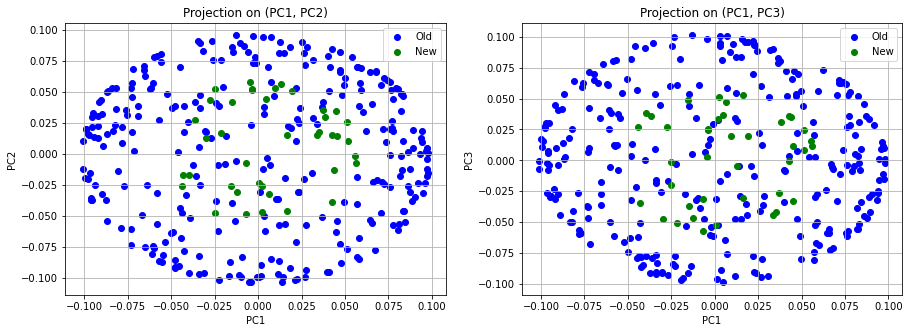

In [72]:
#2.4) ajout d'invidus et de variables supplémentaires :
# ici on génére des nouveaux lignes et colonnes et on les projète sur les vecteurs propres qu'on a obtenu tout à l'heure
# Rappel : 



n, _ = np.shape(X)
# 40 additional individuals:
new_individuals = np.random.normal(0, 1, (40, 3)) 
U = np.transpose(new_individuals)
t = np.sqrt(np.sum(U**2, axis=0))
new_individuals = np.transpose(U / t) / np.sqrt(n)

# 2 additional variables
s = 5
np.random.randn(s)
new_variables = np.random.normal(0, 1, (2, 300)) / np.sqrt(n)


# Visualisation de la projection des nouveaux individus :

# Projection of the old individuals
Z1 = projection_dual(X, 3)[0]
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection on (PC1, PC2)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection on (PC1, PC3)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax1.scatter(Z1[:, 0], Z1[:, 1], c='b',label='Old')
ax2.scatter(Z1[:, 0], Z1[:, 2], c='b',label='Old')
ax1.grid()
ax2.grid()

# Projection of the new individuals
E = hyperplans_dual(X)[1]
Z2 = np.dot(new_individuals, E)
ax1.scatter(Z2[:, 0], Z2[:, 1], c='g',label='New')
ax2.scatter(Z2[:, 0], Z2[:, 2], c='g',label='New')

ax1.legend()
ax2.legend()
plt.show()




C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


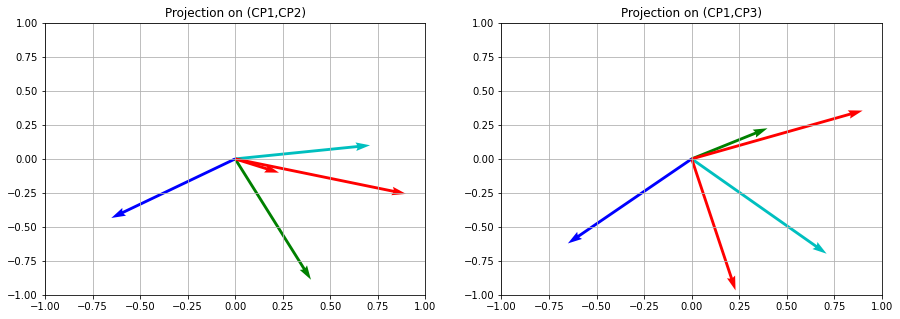

In [73]:
A = np.transpose(X)
Vn,_ = projection_dual(A,3)
B= hyperplans_dual(A)[1][:,:3]
Vn_new = np.dot(new_variables,B)
# Visualisation de la projection des nouvelles variables :

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Projection on (CP1,CP2)")
ax2.set_title("Projection on (CP1,CP3)")
# Define the components of the vectors

vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]
vector4 = Vn_new[0]/np.sqrt(np.sum(Vn_new[0]**2))
vector5 = Vn_new[1]/np.sqrt(np.sum(Vn_new[1]**2))
ax1.grid()
ax2.grid()
# Set the limits of the axes:
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Origin of the vectors
origin = np.zeros(2)

# Draw the vectors
ax1.quiver(origin[0], origin[1], vector1[0], vector1[1], 
           color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax1.quiver(origin[0], origin[1], vector2[0], vector2[1], 
           color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax1.quiver(origin[0], origin[1], vector3[0], vector3[1], 
           color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')
ax1.quiver(origin[0], origin[1], vector4[0], vector4[1], 
           color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z1')
ax1.quiver(origin[0], origin[1], vector5[0], vector5[1], 
           color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z2')


ax2.quiver(origin[0], origin[1], vector1[0], vector1[2], 
           color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax2.quiver(origin[0], origin[1], vector2[0], vector2[2], 
           color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax2.quiver(origin[0], origin[1], vector3[0], vector3[2], 
           color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')
ax2.quiver(origin[0], origin[1], vector4[0], vector4[2], 
           color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z1')
ax2.quiver(origin[0], origin[1], vector5[0], vector5[2], 
           color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z2')

print()
plt.show()
print()

In [74]:
#3). Cas nuage isotrope : 
#3.1). Génération des points isotropes :
#Création d'un nuage non isotrope
n=300
s=5
np.random.seed(s)
xo = sorted(np.random.randn(n))
yo = np.random.randn(n)
zo = np.random.randn(n) + np.arctan(xo,yo)
X = np.array([xo,yo,zo])
X = cennor(np.transpose(X))/np.sqrt(n)

In [75]:
#2.2) # Application de l'ACP et de l'ACP dua sur le nuage :
Vp,_=hyperplans_dual(X) # diagonalisation in space R^p
Vn,_=hyperplans_dual(np.transpose(X)) # diagonalisation in space R^n
Vn=Vn # Eliminating the imaginary part

C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


In [76]:
Vp

array([2.46257149, 0.51608871, 0.0213398 ])

In [77]:
Vn[0:3]

array([2.46257149, 0.51608871, 0.0213398 ])

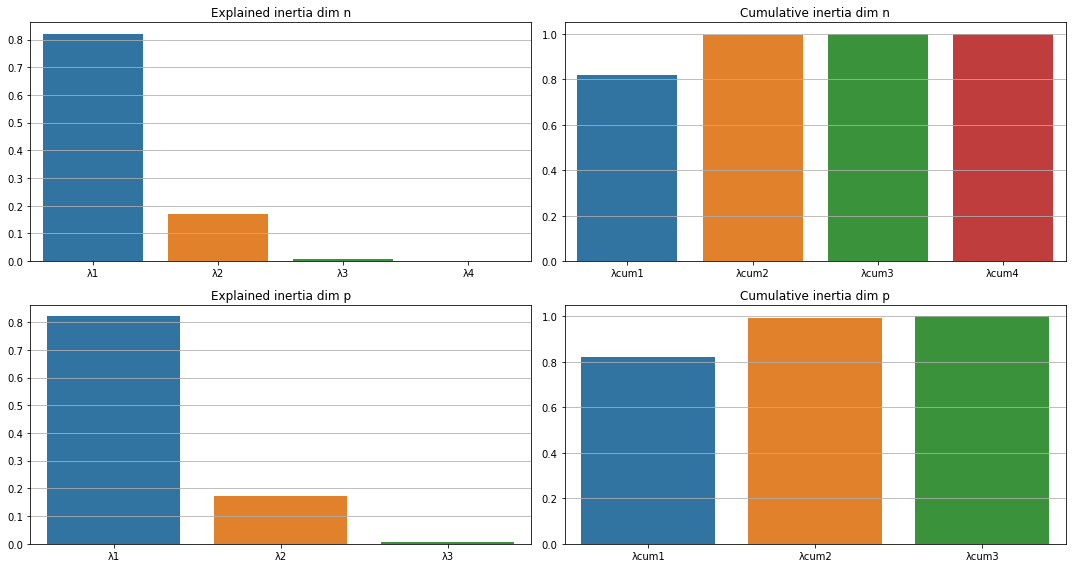

In [78]:
# Create a figure with a 2x2 subplot layout and set the figure size
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 8))

# Set titles for each subplot
ax1.set_title("Explained inertia dim n")
ax2.set_title('Cumulative inertia dim n')
ax3.set_title("Explained inertia dim p")
ax4.set_title('Cumulative inertia dim p')

# Set grids for each subplot
ax1.grid()
ax2.grid()
ax3.grid()
ax4.grid()

# Eignvalues :
n = 4
x = [f'λ{i}' for i in range(1, n + 1)]
a = sum(Vp)
y = [Vn[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax1)

x = [f'λcum{i}' for i in range(1, n + 1)]
y = [sum(Vn[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax2)


n = len(Vp)
x = [f'λ{i}' for i in range(1, n + 1)]
a = sum(Vp)
y = [Vp[i] / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax3)

x = [f'λcum{i}' for i in range(1, n + 1)]
y = [sum(Vp[:i + 1]) / a for i in range(n)]
sb.barplot(x=x, y=y, ax=ax4)
plt.tight_layout()
# Show the plot

print()
plt.show()
print()

In [79]:
A = np.transpose(X)
Vn,_ = projection_dual(A,3)

C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


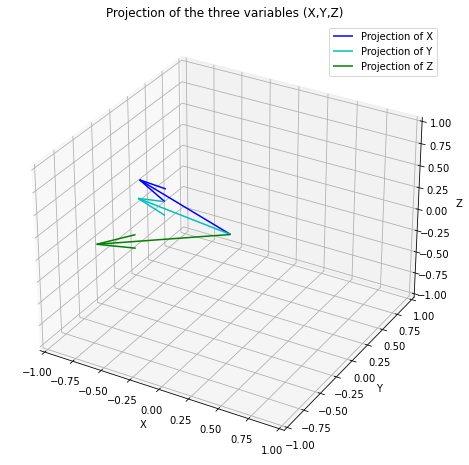

In [80]:
from mpl_toolkits.mplot3d import Axes3D
#2.4.1) Visualisation in 3D
# Créez une figure 3D
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

# Définissez les composantes du vecteur
vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]

# Origine du vecteur
origin = np.zeros(3)

# Dessinez le vecteur
ax.quiver(origin[0], origin[1], origin[2], vector1[0], vector1[1], vector1[2], color='b', label='Projection of X')
ax.quiver(origin[0], origin[1], origin[2], vector2[0], vector2[1], vector2[2], color='c', label='Projection of Y')
ax.quiver(origin[0], origin[1], origin[2], vector3[0], vector3[1], vector3[2], color='g', label='Projection of Z')

# Réglez les limites des axes:
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([-1, 1])

# Étiquetez les axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Affichez la figure
plt.legend()
plt.title('Projection of the three variables (X,Y,Z)')
print()
plt.show()
print()

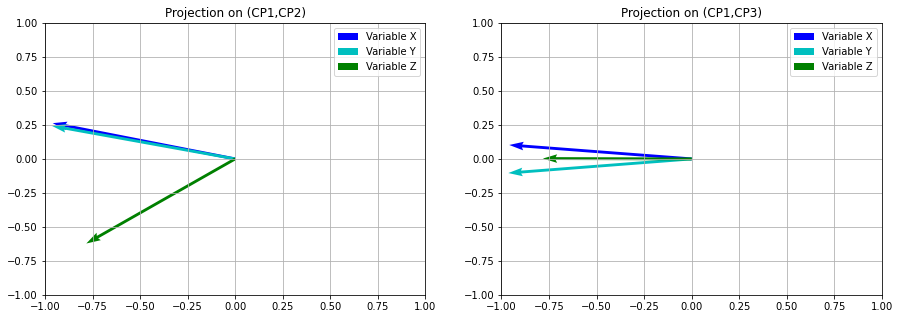

In [81]:
#2.4.2) Visualisation in 2D
# Create a figure
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Projection on (CP1,CP2)")
ax2.set_title("Projection on (CP1,CP3)")
# Define the components of the vectors
vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]

ax1.grid()
ax2.grid()
# Set the limits of the axes:
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Origin of the vectors
origin = np.zeros(2)

# Draw the vectors
ax1.quiver(origin[0], origin[1], vector1[0], vector1[1], color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax1.quiver(origin[0], origin[1], vector2[0], vector2[1], color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax1.quiver(origin[0], origin[1], vector3[0], vector3[1], color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')

ax2.quiver(origin[0], origin[1], vector1[0], vector1[2], color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax2.quiver(origin[0], origin[1], vector2[0], vector2[2], color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax2.quiver(origin[0], origin[1], vector3[0], vector3[2], color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')


ax1.legend()
ax2.legend()
# Display the figure
print()
plt.show()
print()

In [82]:
# Vérification de passage p à n :
print(hyperplans_dual(X)[1])

[[-0.61133331 -0.36607716 -0.70161178]
 [-0.61447895 -0.33909599  0.71234088]
 [-0.49868547  0.86660338 -0.01764603]]


In [83]:
a=passage(np.transpose(X))[:,:3]
print(a)

[[-0.61133331  0.36607716  0.70161178]
 [-0.61447895  0.33909599 -0.71234088]
 [-0.49868547 -0.86660338  0.01764603]]


C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\1284181641.py:5: RuntimeWarning: invalid value encountered in sqrt
  c = np.dot(X,b)/np.sqrt(a)


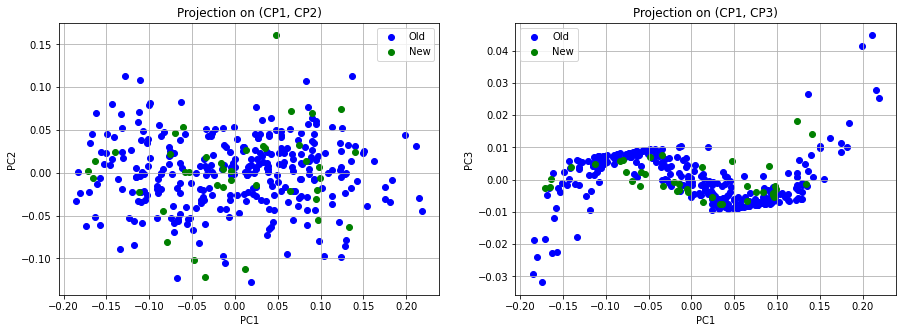

In [84]:
#2.4) ajout d'invidus et de variables supplémentaires :
# ici on génére des nouveaux lignes et colonnes et on les projète sur les vecteurs propres qu'on a obtenu tout à l'heure
# Rappel : 



n,_=np.shape(X)
# 40 individus supplémentaires :

x = sorted(np.random.randn(40))
y = np.random.randn(40)
z = np.random.randn(40) + np.arctan(x,y)
S = np.array([x,y,z])
new_individuals = cennor(np.transpose(S))/np.sqrt(n)

# 2 variables supplémentaires
s=5
np.random.randn(s)
i=xo-5*yo
o=xo+10*zo
new_variables = np.array([i,o])

# Visualisation de la projection des nouveaux individus :

# Projection des anciens individus
Z1 = projection_dual(X,3)[0]
fig = plt.figure(figsize=(15, 5))
ax1 = fig.add_subplot(121)
ax1.set_title('Projection on (CP1, CP2)')
ax1.set_xlabel('PC1')
ax1.set_ylabel('PC2')
ax2 = fig.add_subplot(122)
ax2.set_title('Projection on (CP1, CP3)')
ax2.set_xlabel('PC1')
ax2.set_ylabel('PC3')
ax1.scatter(Z1[:, 0], Z1[:, 1],c='b',label='Old')
ax2.scatter(Z1[:, 0], Z1[:, 2],c='b',label='Old')
ax1.grid()
ax2.grid()

# Projection des nouveux individus
E = hyperplans_dual(X)[1]
Z2 = np.dot(new_individuals,E)
ax1.scatter(Z2[:, 0], Z2[:, 1],c='g',label='New')
ax2.scatter(Z2[:, 0], Z2[:, 2],c='g',label='New')

ax1.legend()
ax2.legend()
print()
plt.show()
print()

C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  s = s.astype(np.float64)
C:\Users\taha\AppData\Local\Temp\ipykernel_1312\4074078228.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  sorted_eigenvectors =sorted_eigenvec.astype(np.float64)


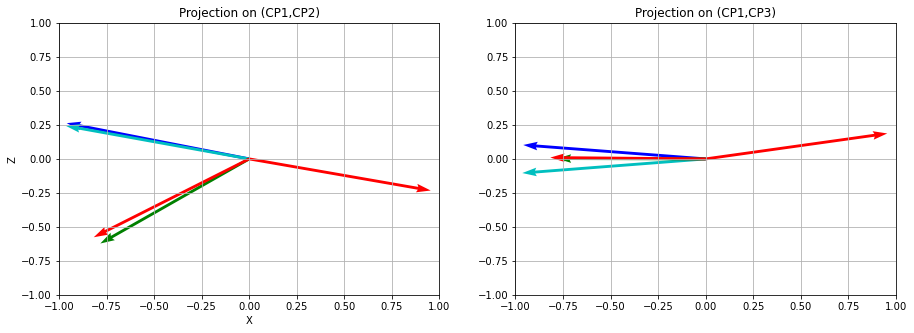

In [85]:
A = np.transpose(X)
Vn,_ = projection_dual(A,3)
B= hyperplans_dual(A)[1][:,:3]
Vn_new = np.dot(new_variables,B)
# Visualisation de la projection des nouvelles variables :

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Projection on (CP1,CP2)")
ax2.set_title("Projection on (CP1,CP3)")
# Define the components of the vectors

vector1 = Vn[0]
vector2 = Vn[1]
vector3 = Vn[2]
vector4 = Vn_new[0]/np.sqrt(np.sum(Vn_new[0]**2))
vector5 = Vn_new[1]/np.sqrt(np.sum(Vn_new[1]**2))
ax1.grid()
ax2.grid()
# Set the limits of the axes:
ax1.set_xlim([-1, 1])
ax1.set_ylim([-1, 1])
ax2.set_xlim([-1, 1])
ax2.set_ylim([-1, 1])

# Origin of the vectors
origin = np.zeros(2)

# Draw the vectors
ax1.quiver(origin[0], origin[1], vector1[0], vector1[1], color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax1.quiver(origin[0], origin[1], vector2[0], vector2[1], color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax1.quiver(origin[0], origin[1], vector3[0], vector3[1], color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')
ax1.quiver(origin[0], origin[1], vector4[0], vector4[1], color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z1')
ax1.quiver(origin[0], origin[1], vector5[0], vector5[1], color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z2')


ax2.quiver(origin[0], origin[1], vector1[0], vector1[2], color='b', angles='xy', scale_units='xy', scale=1, label='Variable X')
ax2.quiver(origin[0], origin[1], vector2[0], vector2[2], color='c', angles='xy', scale_units='xy', scale=1, label='Variable Y')
ax2.quiver(origin[0], origin[1], vector3[0], vector3[2], color='g', angles='xy', scale_units='xy', scale=1, label='Variable Z')
ax2.quiver(origin[0], origin[1], vector4[0], vector4[2], color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z1')
ax2.quiver(origin[0], origin[1], vector5[0], vector5[2], color='r', angles='xy', scale_units='xy', scale=1, label='Variable Z2')


# Label the axes
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_xlabel('X')
ax1.set_ylabel('Z')
# Display the figure
print()
plt.show()
print()

#  ACP sur données réelles environnementales 


In [87]:
import os

# Setting the working directory
new_directory = 'C:\\Users\\taha\\Desktop\\2A\\DATA\\UP2\\TP ACP\\TP1 2'
os.chdir(new_directory)
# Lire le fichier Excel
data = pd.read_excel('TP4_covC1234_DS19_20.xlsx', decimal=',')

# Supprimer des colonnes inutiles dans la suite
columns_to_drop = ['indice', 'TYPE', 'Localisation']
data = data.drop(columns=columns_to_drop)

In [88]:
#Gérer les données manquantes : Pour une variable X on remplace ses données manquantes non pas par la moyenne de cette var 
#sur tous l'échantillon mais par la moyenne de cette variable que pendant la compagne donnée, cela correspond plus à la réalité.
#car on peut voir qu'il y a une grande différence entre les mesures dans les compagnes BF et les mesures dans les compagnes CA.

#Function which assigns to each missing data the average during the given period
def impute_missing_values_by_category(data, category_column):
    # Copy data to avoid modifying the original
    data_imputed = data.copy()

    for column in data.columns:
        if column != category_column and column != 'SAISON':
            # Calculate the mean of the variable for each category
            category_means = data.groupby(category_column)[column].mean()

            # Identify indices of missing values ​​(represented by 0)
            missing_indices = data_imputed[column] == 0

            # Replace missing values with the mean of the corresponding category
            data_imputed.loc[missing_indices, column] = data_imputed.loc[missing_indices, category_column].map(category_means)

    return data_imputed

# Using the function
data_corrige1 = impute_missing_values_by_category(data, 'Campagne')


                     10_ane       13_ane       14_ane    1_M_2_PA       9_ane  \
Campagne SAISON                                                                 
BF2      hiver    38.095633    21.414714    42.922017   48.731687   22.407794   
BF3      hiver   102.494935    58.145027    30.761745   73.203228   52.480000   
CA1      hiver   133.188390   140.238788   396.021912  320.845806   86.275471   
CA2      été     690.685507  3779.349060  5999.949335  863.214067  228.061505   
CA3      hiver   249.324598   205.654314  1079.762165  167.674146   68.959656   
CA4      été     199.658865   558.271084  1704.504659  232.596805  107.425136   

                          B          BTM           E  FormicAcid  \
Campagne SAISON                                                    
BF2      hiver    14.583022   161.704140   67.970605   29.866504   
BF3      hiver    19.354274   307.478029  157.683310   55.655680   
CA1      hiver    41.425457   628.427551  225.705478  419.277411   
CA2      ét

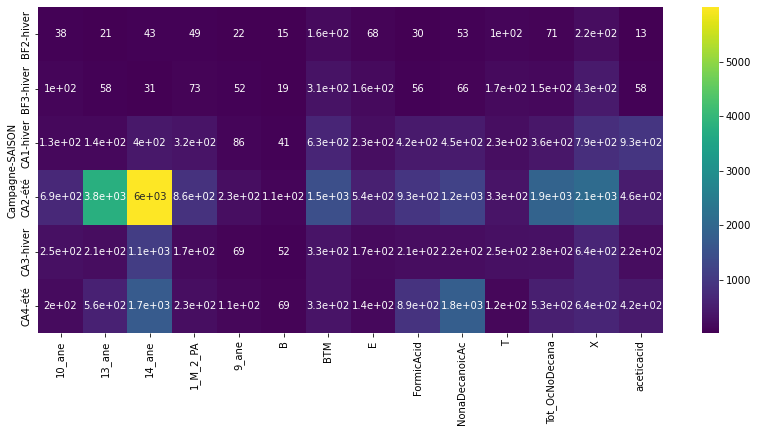

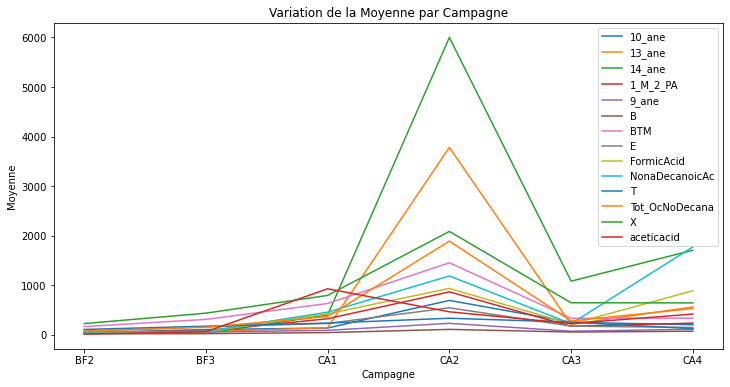

In [89]:
#Analyse Statistique: 


# Calculer le tableau de moyennes : moyenne de chaque variable par chaque compagne 
mean_table = data_corrige1.pivot_table(index=['Campagne', 'SAISON'], aggfunc='mean')

print(mean_table)
# Afficher le tableau de moyennes
plt.figure(figsize=(14, 6))
sb.heatmap(mean_table, annot=True, cmap='viridis')
plt.show()

# Creer un graphique linéaire pour chaque variable
plt.figure(figsize=(12, 6))
for variable in mean_table.columns:
    plt.plot(mean_table.index.levels[0], mean_table[variable], label=variable)


plt.xlabel('Campagne')
plt.ylabel('Moyenne')
plt.title('Variation de la Moyenne par Campagne')
plt.legend()
plt.show()

                     10_ane      13_ane       14_ane    1_M_2_PA       9_ane  \
Campagne SAISON                                                                
BF2      hiver    14.416253   13.670617    34.078403  118.468215    5.897971   
BF3      hiver    93.065739   31.029644    18.343182   65.632581   33.067545   
CA1      hiver    50.002170   77.160859   237.546559  691.568915   36.273317   
CA2      été     915.504764  598.265319  1743.607022  935.850115  110.899129   
CA3      hiver    58.790000   96.809514   480.642518  138.023870   15.723494   
CA4      été      84.803853  324.033532   542.175875  186.131493  101.322501   

                         B          BTM           E  FormicAcid  \
Campagne SAISON                                                   
BF2      hiver    4.734951   214.956614   32.323463    5.256121   
BF3      hiver    3.217718   169.638767   56.201735    9.520422   
CA1      hiver   12.555213  1342.352733  264.971228  314.826746   
CA2      été     14.9546

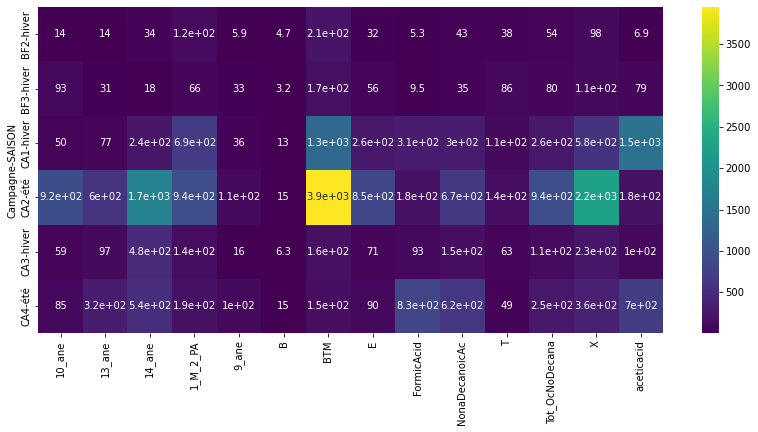

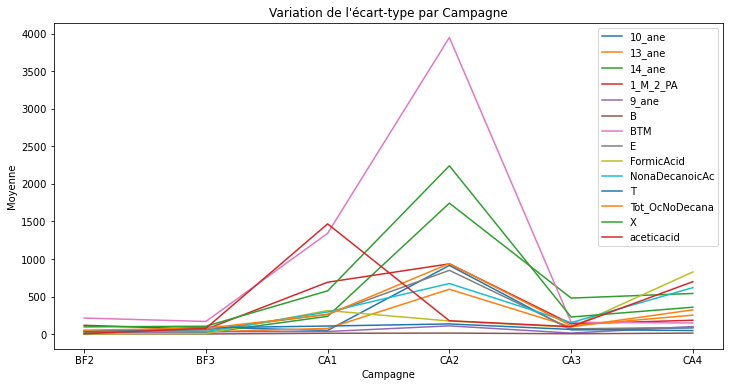

In [90]:
# Calculate standard deviation table
std_table = data.pivot_table(index=['Campagne', 'SAISON'], aggfunc='std')

# Show standard deviation table
print(std_table)
plt.figure(figsize=(14, 6))
sb.heatmap(std_table, annot=True, cmap='viridis')
plt.show()

# Create a linear graph for each variable
plt.figure(figsize=(12, 6))
for variable in std_table.columns:
    plt.plot(std_table.index.levels[0], std_table[variable], label=variable)

plt.xlabel('Campagne')
plt.ylabel('Moyenne')
plt.title('Variation de l\'écart-type par Campagne')
plt.legend()
plt.show()

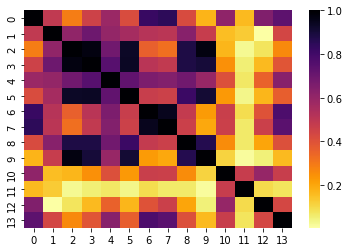

In [92]:
# Suppression des colonnes 'Compagne' et 'SAISON'
columns_to_drop = ['Campagne', 'SAISON']
data_pour_ACP = data_corrige1.drop(columns=columns_to_drop)
# Normalizing the data and visualizing the correlation between the variables

X=data_to_matrix(data_pour_ACP)
X=cennor(X)
sb.heatmap(cov(X),cmap="inferno_r") 
plt.show()

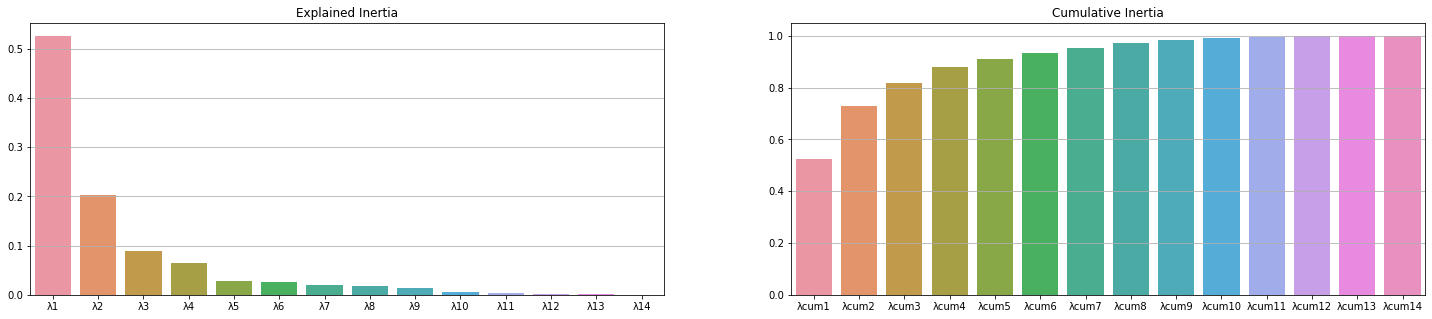

In [93]:
fig = plt.figure(figsize=(25,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.set_title("Explained Inertia")
ax1.grid()
ax2.set_title('Cumulative Inertia')
ax2.grid()
Vpn = hyperplans(X)[0]
n=len(Vpn)
x = [f'λ{i}' for i in range(1, n+1)]  
a = sum(Vpn)
y = [Vpn[i]/a for i in range(n)] 
sb.barplot(x=x, y=y,ax=ax1)
x = [f'λcum{i}' for i in range(1, n+1)]
y = [sum(Vpn[:i+1])/a for i in range(n)]
sb.barplot(x=x, y=y,ax=ax2)
plt.show()

In [94]:
# Choix du nombre de composantes : Régle de Kaiser-Guttman
print(K_G(X))

3


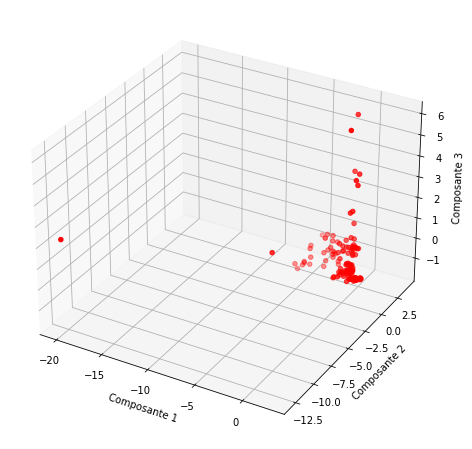

In [95]:
#on projecte :
X_k, X_p = projection(X, 1, 3)
# Créer une figure 3D
fig = plt.figure(figsize=(15, 8)) 


# Ajouter un sous-plot 3D à la figure
ax = fig.add_subplot(111, projection='3d')
x = X_k[:, 0]
y = X_k[:, 1]
z = X_k[:, 2]
ax.scatter(x, y, z, c='r', marker='o')
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')


# Afficher le plot
plt.show()

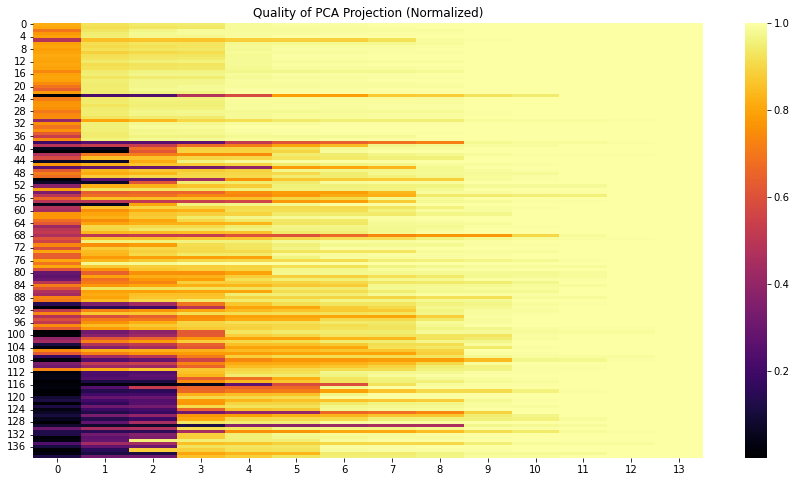

In [96]:
#Quality of projection 

d = np.transpose(matrix_quality(X, 1))[:]
fig = plt.figure(figsize=(15, 8))
plt.title("Quality of PCA Projection (Normalized)")
sb.heatmap(d, cmap="inferno")


plt.show()

Indices des points les plus contribuants à la première composante : [54 61 62 63 64 67 71 73 75 76 77 78 79 84 85]


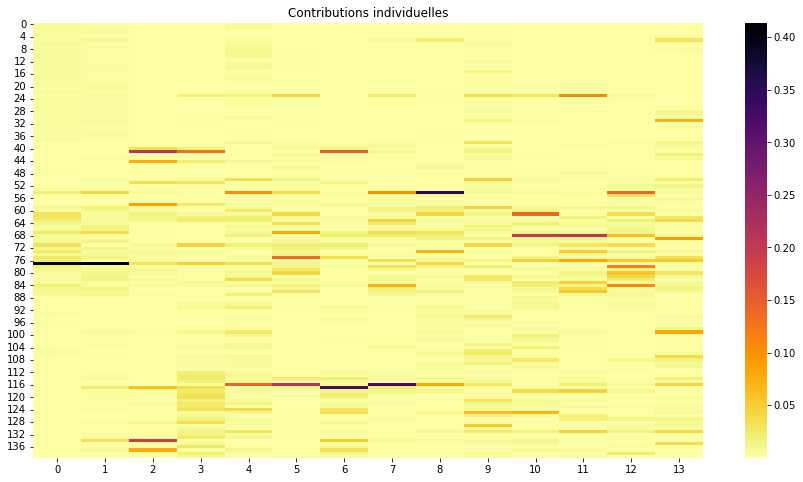

In [97]:
#Contribution : 
d=contribution(X,1,14)[:]
fig = plt.figure(figsize=(15, 8))
plt.title("Contributions individuelles")
sb.heatmap(d, cmap="inferno_r")

seuil=0.01
indices_most_contributed = np.where(d[:, 0] > seuil)[0]

# Afficher les indices des lignes
print("Indices des points les plus contribuants à la première composante :", indices_most_contributed)

plt.show()

In [99]:
#Remove rows from projected individuals

# List of clues to delete
indices_a_supprimer = indices_most_contributed

# Delete rows with specified indices
X_k0 = np.delete(X_k, indices_a_supprimer, axis=0)
# Removing rows of extremal individuals from the data: 
data_corrige2 = data_corrige1.drop(indices_a_supprimer)


# Ajouter les colonnes de Campagne et saison au donnees projetees: 
# Selection of the last two columns: : Campagne et saison
dernieres_colonnes = data_corrige2.iloc[:, -2:]
# Conversion des deux dernières colonnes en une array numpy
dernieres_colonnes_array = np.array(dernieres_colonnes)
#Ajouter les colonnes au individus projetés avant
result = np.concatenate((X_k0, dernieres_colonnes_array ), axis=1)


df = pd.DataFrame(result)
df.head()


,0,1,2,3,4
0,2.448298,-0.865225,-0.353437,hiver,BF2
1,2.43931,-0.902979,-0.350339,hiver,BF2
2,1.986907,-1.15136,-0.44208,hiver,BF2
3,2.127718,-1.036295,-0.423417,hiver,BF2
4,2.194674,-0.981143,-0.382634,hiver,BF2


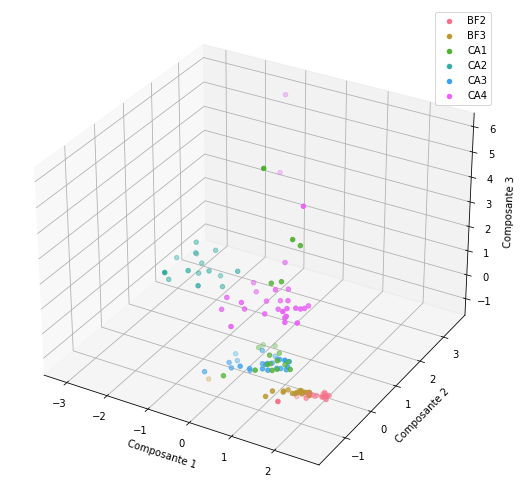

In [100]:

# Créez une figure 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Liste des catégories uniques
categories = df[4].unique()

# Assignez une couleur unique à chaque catégorie
palette = sb.color_palette("husl", n_colors=len(categories))

# Parcourez les données et tracez les points avec des couleurs basées sur la catégorie
for i, cat in enumerate(categories):
    subset = df[df[4] == cat]
    ax.scatter(subset[0], subset[1], subset[2], label=f'{cat}', c=[palette[i]])

# Ajoutez des légendes
ax.legend()

# Ajoutez des étiquettes d'axe
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

plt.show()

In [101]:
#Supprimer les lignes à partir des données initiales puis refaire l'ACP

X1=data_to_matrix(data_pour_ACP)
# Liste d'indices à supprimer
indices_a_supprimer = indices_most_contributed

# Supprimer les lignes avec les indices spécifiés
X1 = np.delete(X1, indices_a_supprimer, axis=0)
X1=cennor(X1)
#on projecte :
X_k1, X_p = projection(X1, 1, 3)   # La fonction 'projection' applique l'ACP dedans puis projecte.

# Ajouter les colonnes de Campagne et saison : 

# Sélection des deux dernières colonnes : Campagne et saison
dernieres_colonnes = data_corrige2.iloc[:, -2:]
# Conversion des deux dernières colonnes en une array numpy
dernieres_colonnes_array = np.array(dernieres_colonnes)
#Ajouter les colonnes au individus projetés avant
result1 = np.concatenate((X_k1, dernieres_colonnes_array ), axis=1)

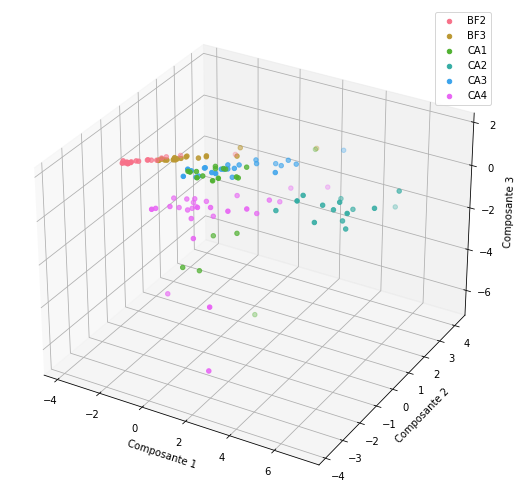

In [102]:
df1 = pd.DataFrame(result1)
# Créez une figure 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Liste des catégories uniques
categories = df1[4].unique()

# Assignez une couleur unique à chaque catégorie
palette = sb.color_palette("husl", n_colors=len(categories))

# Parcourez les données et tracez les points avec des couleurs basées sur la catégorie
for i, cat in enumerate(categories):
    subset = df1[df1[4] == cat]
    ax.scatter(subset[0], subset[1], subset[2], label=f'{cat}', c=[palette[i]])

# Ajoutez des légendes
ax.legend()

# Ajoutez des étiquettes d'axe
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

plt.show()

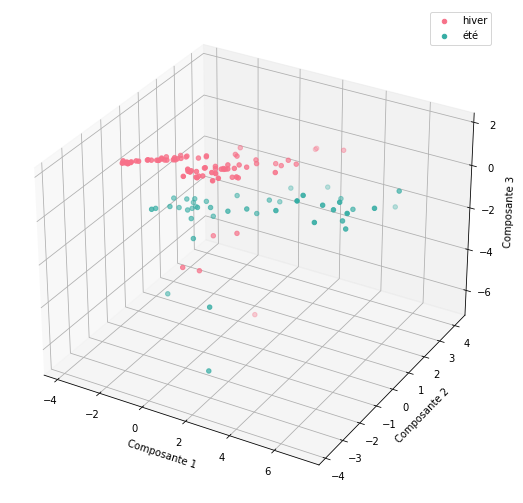

In [103]:
# Créez une figure 3D
fig = plt.figure(figsize=(12, 9))
ax = fig.add_subplot(111, projection='3d')

# Liste des catégories uniques
categories = df1[3].unique()

# Assignez une couleur unique à chaque catégorie
palette = sb.color_palette("husl", n_colors=len(categories))

# Parcourez les données et tracez les points avec des couleurs basées sur la catégorie
for i, cat in enumerate(categories):
    subset = df1[df1[3] == cat]
    ax.scatter(subset[0], subset[1], subset[2], label=f'{cat}', c=[palette[i]])

# Ajoutez des légendes
ax.legend()

# Ajoutez des étiquettes d'axe
ax.set_xlabel('Composante 1')
ax.set_ylabel('Composante 2')
ax.set_zlabel('Composante 3')

plt.show()

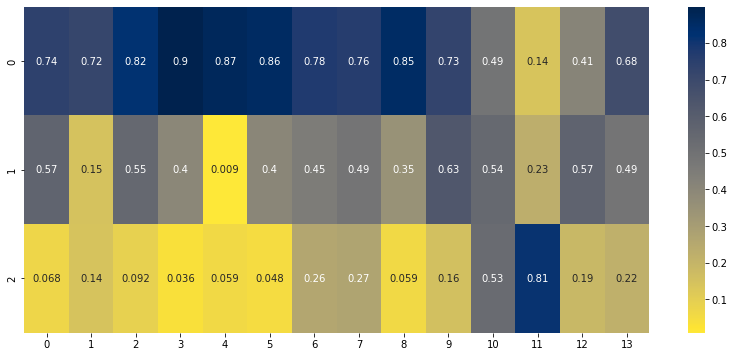

In [104]:
def calculer_correlation(v1, v2):
    return np.abs(np.corrcoef(v1, v2)[0, 1])
L = []
for i in range(3):
    S = [calculer_correlation(X_k[:, i], X[:, j]) for j in range(14)]
    L += S 

L = np.array(L).reshape(3, 14)
plt.figure(figsize=(14, 6))
sb.heatmap(L, annot=True, cmap="cividis_r")
plt.show()

In [105]:
# Comparer avec les vecteurs propres
Vpn = hyperplans(X)[1]
Vpn[:,:3]

array([[-0.27348568,  0.33726042, -0.06150532],
       [-0.26382686, -0.08656965, -0.12786917],
       [-0.30134195, -0.32669262,  0.0830161 ],
       [-0.33128887, -0.23634194,  0.03199023],
       [-0.32060262,  0.00533989, -0.05268837],
       [-0.3156097 , -0.24021201,  0.04323571],
       [-0.28580843,  0.2691521 , -0.23524391],
       [-0.28067334,  0.28797778, -0.24474861],
       [-0.31434153, -0.20846164,  0.05294998],
       [-0.26759789, -0.37401366,  0.13946671],
       [-0.1810052 ,  0.32167018,  0.47999017],
       [-0.05133045,  0.13385763,  0.72886339],
       [-0.15202404,  0.33873818,  0.16961529],
       [-0.25150335,  0.28912897, -0.19851483]])